In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv(r"C:\Users\Darshan\Downloads\index.csv")
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
df.shape

(1133, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1128    False
1129    False
1130    False
1131    False
1132    False
Length: 1133, dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [9]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.set_index("date", inplace=True)

In [12]:
df_grouped = df.groupby('date')['money'].sum().reset_index()

In [13]:
df_grouped.columns = ['date', 'sales']

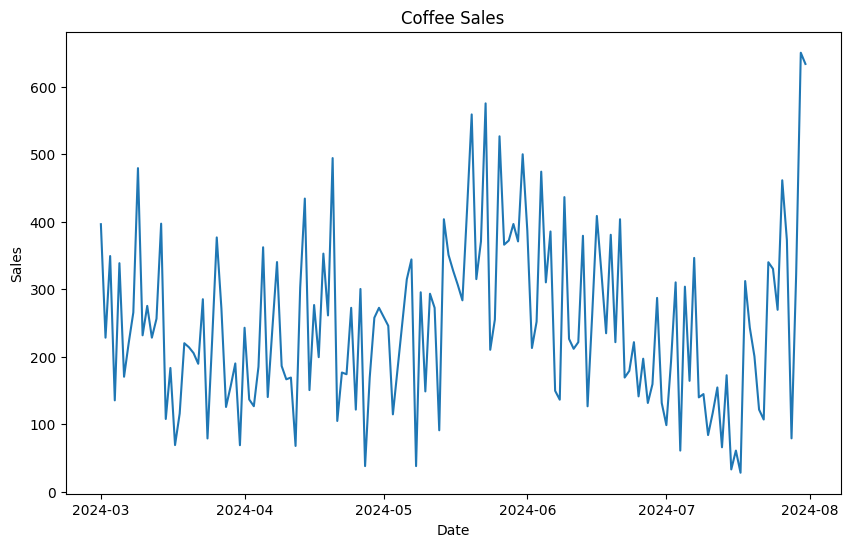

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_grouped['date'], df_grouped['sales'])
plt.title('Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model = ARIMA(df_grouped['sales'], order=(1,1,1))
model_fit = model.fit()

In [20]:
model_fit = model.fit()

In [21]:
forecast = model_fit.forecast(steps=30)

In [22]:
forecast

150    407.816302
151    425.381528
152    424.016462
153    424.122547
154    424.114303
155    424.114943
156    424.114893
157    424.114897
158    424.114897
159    424.114897
160    424.114897
161    424.114897
162    424.114897
163    424.114897
164    424.114897
165    424.114897
166    424.114897
167    424.114897
168    424.114897
169    424.114897
170    424.114897
171    424.114897
172    424.114897
173    424.114897
174    424.114897
175    424.114897
176    424.114897
177    424.114897
178    424.114897
179    424.114897
Name: predicted_mean, dtype: float64

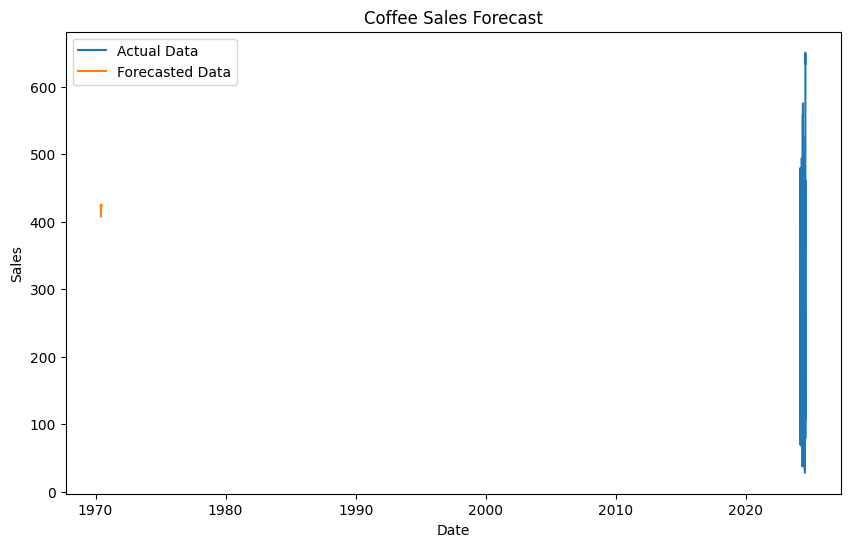

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df_grouped['date'], df_grouped['sales'], label='Actual Data')
plt.plot([None for i in df_grouped['sales']] + [x for x in forecast], label='Forecasted Data')
plt.title('Coffee Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()